In [68]:
#pip install tensorflow

In [80]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [81]:
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import re
print("Tensorflow Version",tf.__version__)

Tensorflow Version 2.14.0


In [83]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='latin',header=None)
#df = pd.read_csv('Tweets.csv',encoding='latin',header=None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [84]:
df.columns = ['sentiment','id','date','query','user_id','text']
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [85]:
df = df.drop(['id','date','query','user_id'], axis=1)
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [86]:
df = df[df['text'].str.contains('E3')]
print(df)

         sentiment                                               text
216              0  I'm sweating my forthcoming trip to E3.  If I ...
26400            0                   @SLUMVILLAGE313 What about DC!? 
26744            0  @SE3Photo actually no idea, jst curious why ur...
31606            0  omg I love my new car - wish I could keep my o...
60425            0  Working on EE3001 Assignment, have been since ...
...            ...                                                ...
1580336          4  At E39.95 for the kobe burger at the Gourmet B...
1582188          4  @SkE342  i started followin u days ago and u s...
1583193          4               Hey Joe, how are you?  @AVERAGEJOE33
1583448          4  @AVERAGEJOE33 Heh, it'd be fun working with ol...
1586081          4  Where do you get your energy from?  I wish I c...

[876 rows x 2 columns]


In [87]:
lab_to_sentiment = {0:"Negative", 4:"Positive"}
def label_decoder(label):
    return lab_to_sentiment[label]
df.sentiment = df.sentiment.apply(lambda x: label_decoder(x))
df.head

<bound method NDFrame.head of         sentiment                                               text
216      Negative  I'm sweating my forthcoming trip to E3.  If I ...
26400    Negative                   @SLUMVILLAGE313 What about DC!? 
26744    Negative  @SE3Photo actually no idea, jst curious why ur...
31606    Negative  omg I love my new car - wish I could keep my o...
60425    Negative  Working on EE3001 Assignment, have been since ...
...           ...                                                ...
1580336  Positive  At E39.95 for the kobe burger at the Gourmet B...
1582188  Positive  @SkE342  i started followin u days ago and u s...
1583193  Positive               Hey Joe, how are you?  @AVERAGEJOE33
1583448  Positive  @AVERAGEJOE33 Heh, it'd be fun working with ol...
1586081  Positive  Where do you get your energy from?  I wish I c...

[876 rows x 2 columns]>

Text(0.5, 1.0, 'Sentiment Data Distribution')

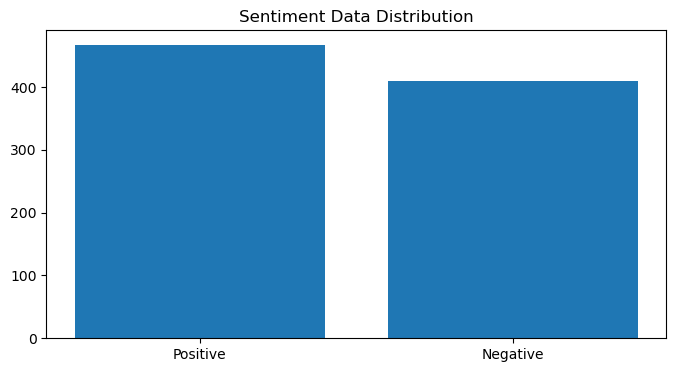

In [88]:
val_count = df.sentiment.value_counts()
plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [91]:
#import random
#random_idx_list = [random.randint(1,len(df.text)) for i in range(10)]
#df.loc[random_idx_list,:].head(10)

In [92]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [93]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [94]:
df.text= df.text.apply(lambda x: preprocess(x))

In [95]:
#pip install wordcloud

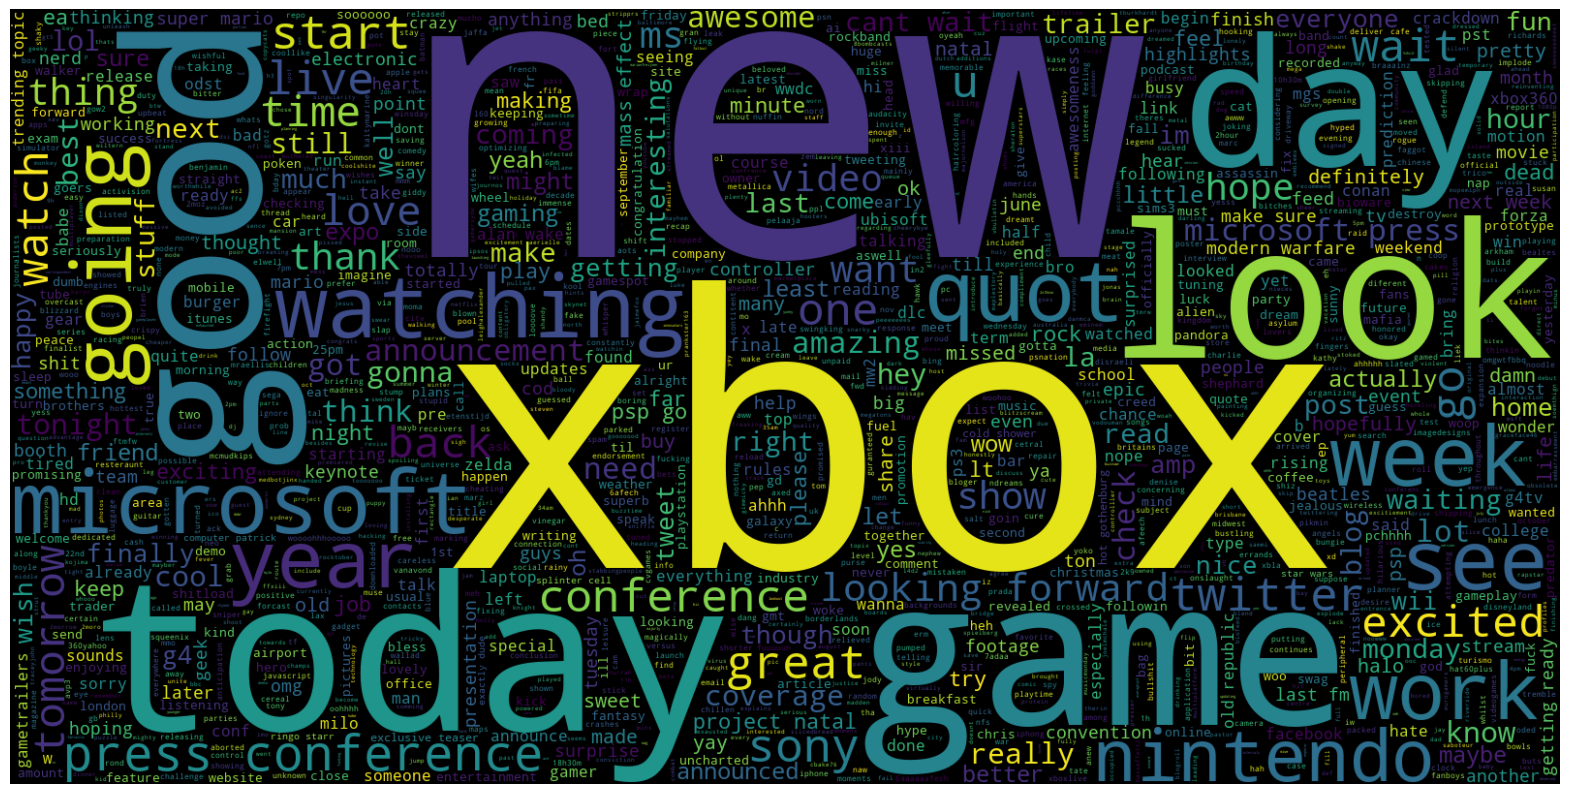

In [103]:
#from wordcloud import WordCloud

#plt.figure(figsize = (20,20)) 
#wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Positive'].text))
#plt.imshow(wc , interpolation = 'bilinear')

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming 'df' is your DataFrame with columns like 'sentiment' and 'text'
positive_text = " ".join(df[df.sentiment == 'Positive'].text)

# Create a WordCloud object
wc = WordCloud(max_words=2000, width=1600, height=800, background_color='black')

# Generate the word cloud
wordcloud = wc.generate(positive_text)

# Exclude the most repeated word
# This assumes that the most common word is the first one in the list of words
words = list(wordcloud.words_.keys())
if words:
    most_common_word = words[0]
    positive_text = positive_text.replace(most_common_word, '')

# Create the word cloud excluding the most repeated word
wordcloud = wc.generate(positive_text)

# Display the word cloud
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Turn off axis labels
plt.show()


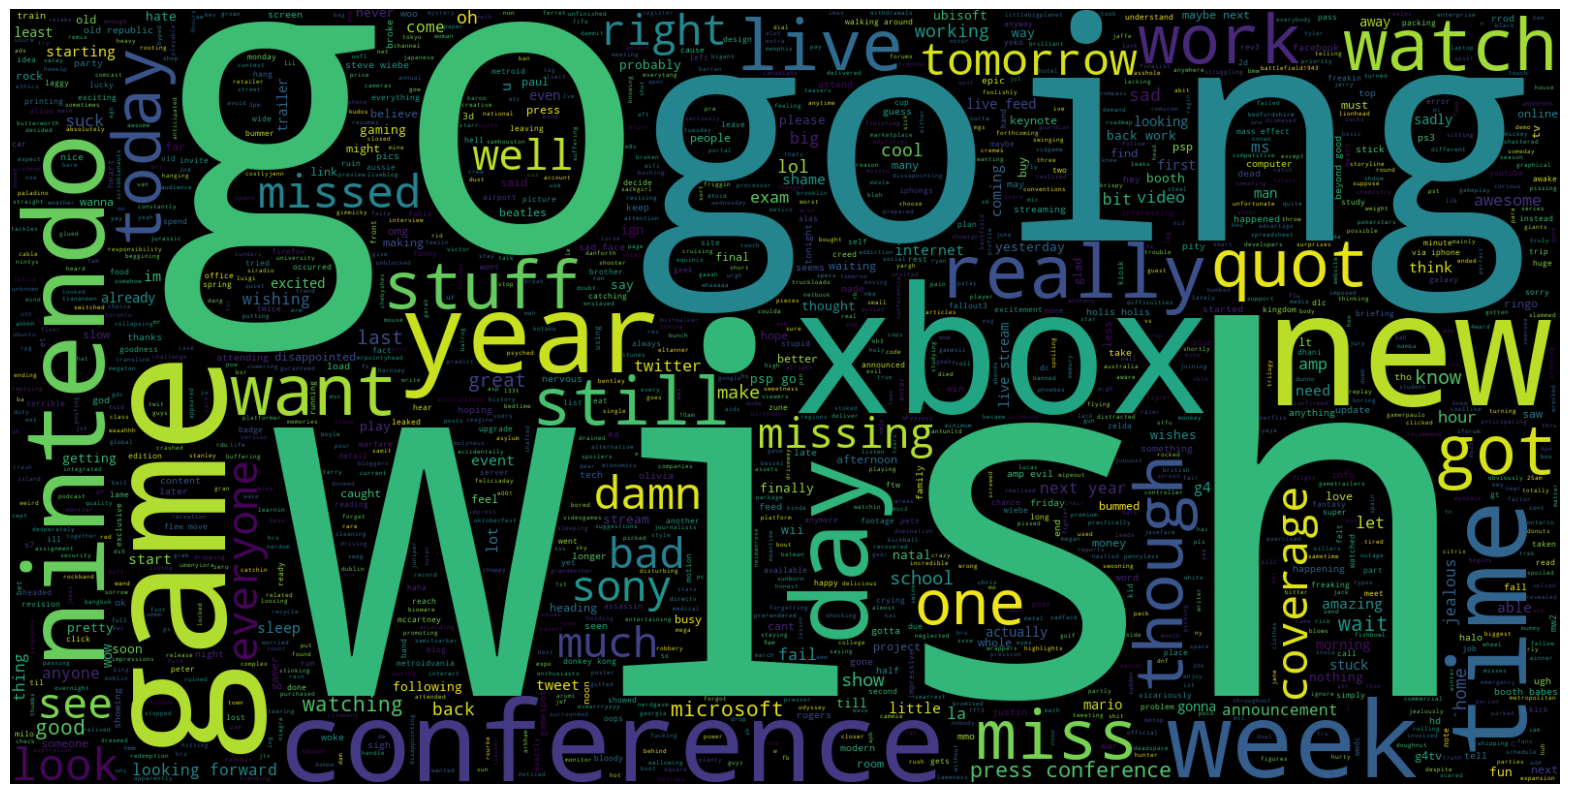

In [104]:
#plt.figure(figsize = (20,20)) 
#wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Negative'].text))
#plt.imshow(wc , interpolation = 'bilinear')

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming 'df' is your DataFrame with columns like 'sentiment' and 'text'
positive_text = " ".join(df[df.sentiment == 'Negative'].text)

# Create a WordCloud object
wc = WordCloud(max_words=2000, width=1600, height=800, background_color='black')

# Generate the word cloud
wordcloud = wc.generate(positive_text)

# Exclude the most repeated word
# This assumes that the most common word is the first one in the list of words
words = list(wordcloud.words_.keys())
if words:
    most_common_word = words[0]
    positive_text = positive_text.replace(most_common_word, '')

# Create the word cloud excluding the most repeated word
wordcloud = wc.generate(positive_text)

# Display the word cloud
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Turn off axis labels
plt.show()


In [118]:
from collections import Counter

# Assuming 'df' is your DataFrame with columns like 'sentiment' and 'text'

# Function to create an enumerated descending sorted list with count numbers, excluding the most repeated word
def create_enumerated_descending_list_excluding_most_repeated(sentiment, top_n=10):
    sentiment_text = " ".join(df[df.sentiment == sentiment].text)
    sentiment_words = sentiment_text.split()
    word_counts = Counter(sentiment_words)

    # Exclude the most repeated word
    if word_counts:
        most_common_word = word_counts.most_common(1)[0][0]
        del word_counts[most_common_word]

    most_repeated_words_sorted = word_counts.most_common(top_n)
    enumerated_list = list(enumerate(sorted(most_repeated_words_sorted, key=lambda x: x[1], reverse=True), start=1))
    return enumerated_list

# Create enumerated descending lists with count numbers, excluding the most repeated word, for both positive and negative sentiments
positive_list = create_enumerated_descending_list_excluding_most_repeated('Positive')
negative_list = create_enumerated_descending_list_excluding_most_repeated('Negative')

# Display the enumerated lists with count numbers, excluding the most repeated word
print("Positive Sentiment:")
for index, (word, count) in positive_list:
    print(f"{index}. {word} - Count: {count}")

print("\nNegative Sentiment:")
for index, (word, count) in negative_list:
    print(f"{index}. {word} - Count: {count}")




Positive Sentiment:
1. new - Count: 46
2. today - Count: 40
3. conference - Count: 40
4. microsoft - Count: 40
5. press - Count: 35
6. good - Count: 31
7. xboxe3 - Count: 30
8. week - Count: 29
9. wait - Count: 27
10. watching - Count: 27

Negative Sentiment:
1. wish - Count: 56
2. go - Count: 43
3. going - Count: 35
4. conference - Count: 33
5. live - Count: 32
6. year - Count: 30
7. could - Count: 28
8. 2 - Count: 28
9. nintendo - Count: 25
10. work - Count: 24


In [126]:
from collections import Counter

# Assuming 'df' is your DataFrame with columns like 'sentiment' and 'text'

# Function to get three enumerated lists with ten records each, with the text using the second, third, and fourth most repeated words with negative sentiment
def get_three_enumerated_lists_second_third_fourth_most_repeated_negative(df, records_per_list=10):
    negative_text = " ".join(df[df.sentiment == 'Negative'].text)
    negative_words = negative_text.split()
    word_counts = Counter(negative_words)

    # Get the second, third, and fourth most repeated words
    second_most_repeated_word = word_counts.most_common(2)[-1][0]
    third_most_repeated_word = word_counts.most_common(3)[-1][0]
    fourth_most_repeated_word = word_counts.most_common(4)[-1][0]

    # Get the text using the second, third, and fourth most repeated words
    text_with_second_most_repeated_word = [text for text in df[df.sentiment == 'Negative'].text if second_most_repeated_word in text.split()][:records_per_list]
    text_with_third_most_repeated_word = [text for text in df[df.sentiment == 'Negative'].text if third_most_repeated_word in text.split()][:records_per_list]
    text_with_fourth_most_repeated_word = [text for text in df[df.sentiment == 'Negative'].text if fourth_most_repeated_word in text.split()][:records_per_list]

    # Create enumerated lists
    enumerated_list_second_most_repeated = list(enumerate(text_with_second_most_repeated_word, start=1))
    enumerated_list_third_most_repeated = list(enumerate(text_with_third_most_repeated_word, start=1))
    enumerated_list_fourth_most_repeated = list(enumerate(text_with_fourth_most_repeated_word, start=1))

    return enumerated_list_second_most_repeated, enumerated_list_third_most_repeated, enumerated_list_fourth_most_repeated

# Generate three enumerated lists with ten records each, with the text from the 'text' column using the second, third, and fourth most repeated words with negative sentiment
enumerated_list_second_most_repeated, enumerated_list_third_most_repeated, enumerated_list_fourth_most_repeated = get_three_enumerated_lists_second_third_fourth_most_repeated_negative(df, records_per_list=10)

# Display the results
print("Second Most Repeated Word:")
for index, text in enumerated_list_second_most_repeated:
    print(f"{index}. {text}")

print("\nThird Most Repeated Word:")
for index, text in enumerated_list_third_most_repeated:
    print(f"{index}. {text}")

print("\nFourth Most Repeated Word:")
for index, text in enumerated_list_fourth_most_repeated:
    print(f"{index}. {text}")





Second Most Repeated Word:
1. omg love new car wish could keep old one driveway looks awesome 2 e30 parked
2. wish could attend e3 year small events like nba stanley cup finals keep getting way work work work
3. wish could go e3 oh well
4. hyped e3 wish could go
5. wish could heading la e3 le sigh maybe someday
6. lol psp go like ive heard little bit wish going e3
7. really wish able go e3 wanna see video gt lt
8. wish could go e3 year
9. wish could e3
10. sweetness wish could go e3 one year

Third Most Repeated Word:
1. wish could go e3 oh well
2. hyped e3 wish could go
3. know funny thing everyone packing e3 packing go mexico e3
4. also want go e3
5. looking 4ward e3 shame go though
6. saw sony pulled chris paladino qore video w psp go e3
7. lol psp go like ive heard little bit wish going e3
8. really wish able go e3 wanna see video gt lt
9. stoked e3 disappointed new psp go though dual sticks poor choice
10. wish could go e3 year

Fourth Most Repeated Word:
1. everyone going e3 stay

In [127]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [128]:
train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 700
Test Data size 176


In [129]:
train_data.head(10)

,sentiment,text
1525825,Positive,nope make room e3 coverage ahve story next wee...
1239327,Positive,kaitymarine watch e3 mcmudkips
1096222,Positive,e3zem ya wallad waiting someone go eat none
1298070,Positive,nintendo presser starting e3 noowww think stil...
1250778,Positive,hey e3ers one friday buzztime trivia topix gam...
325772,Negative,e3 god war 3 last trilogy
1297525,Positive,woo twitter live feed e3 conference
1239057,Positive,video player going work 5 minutes start xboxe3
253140,Negative,sweetness wish could go e3 one year
1236127,Positive,love e3 week


In [130]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 2094


In [131]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (700, 30)
Testing X Shape: (176, 30)


In [132]:
labels = train_data.sentiment.unique().tolist()

In [133]:
encoder = LabelEncoder()
encoder.fit(train_data.sentiment.to_list())

y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (700, 1)
y_test shape: (176, 1)


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2023-11-10 20:38:05--  http://nlp.stanford.edu/data/glove.6B.zip
Resolviendo nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Conectando con nlp.stanford.edu (nlp.stanford.edu)[171.64.67.140]:80... conectado.
Petición HTTP enviada, esperando respuesta... 302 Found
Ubicación: https://nlp.stanford.edu/data/glove.6B.zip [siguiente]
--2023-11-10 20:38:05--  https://nlp.stanford.edu/data/glove.6B.zip
Conectando con nlp.stanford.edu (nlp.stanford.edu)[171.64.67.140]:443... conectado.
Petición HTTP enviada, esperando respuesta... 301 Moved Permanently
Ubicación: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [siguiente]
--2023-11-10 20:38:05--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolviendo downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Conectando con downloads.cs.stanford.edu (downloads.cs.stanford.edu)[171.64.64.22]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 862182613 (822M) [application/zip]
Gu

In [ ]:
GLOVE_EMB = 'glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = 'best_model.hdf5'

In [ ]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))